In [1]:
import json
from pprint import pprint
import glob
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
hist_zip = pd.read_csv('.\data\hist_price_total\hist_price_with_zip.csv')
hist_zip.head()

,property_id,event_name,date,price,price_range_min,price_range_max,price_changed,sqft,datasource_name,source,listing,iso_date,listing_id,previous_event_price,postal_code
0,M3392201642,Price Changed,2020-10-17T17:00:00Z,355000,NaN,NaN,5000,1750,BrightMLS,MLS #PAPH935838,NaN,NaN,NaN,NaN,19116
1,M3392201642,Listed,2020-10-11T17:00:00Z,350000,NaN,NaN,0,1750,BrightMLS,MLS #PAPH935838,NaN,NaN,NaN,NaN,19116
2,M3164904583,Listed,2020-10-11T17:00:00Z,149900,NaN,NaN,0,1176,BrightMLS,MLS #PAPH944164,NaN,NaN,NaN,NaN,19143
3,M3164904583,Sold,2002-03-18T17:00:00Z,70500,NaN,NaN,0,1176,NaN,Public Record,NaN,NaN,NaN,NaN,19143
4,M3164904583,Sold,1988-09-21T17:00:00Z,33900,NaN,NaN,0,1176,NaN,Public Record,NaN,NaN,NaN,NaN,19143


In [3]:
for_sale = pd.read_csv('./data/update_df.csv')
for_sale.head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,last_update,photo_count,page_no,rank,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,2020-10-13T17:54:05Z,9,1,1,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,2020-10-13T18:18:18Z,7,1,2,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,2020-10-13T17:24:20Z,35,1,3,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,2020-10-13T17:11:54Z,123,1,4,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,2020-10-13T17:02:13Z,33,1,5,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


In [5]:
for_sale.shape

(9562, 26)

In [6]:
for_sale.columns

Index(['property_id', 'prop_type', 'prop_sub_type', 'prop_status', 'price',
       'baths_full', 'baths', 'beds', 'last_update', 'photo_count', 'page_no',
       'rank', 'baths_half', 'city', 'line', 'postal_code', 'state_code',
       'county', 'lat', 'lon', 'neighborhood_name', 'buiding_size(sqft)',
       'lot_size(sqft)', 'agent_id', 'agent_name', 'brand_name'],
      dtype='object')

In [7]:
for_sale = for_sale.drop(columns=['last_update', 'page_no', 'rank'])

In [45]:
for_sale1 = for_sale.copy()

In [29]:
# for_sale.to_csv('.\data\sale.csv',encoding='utf-8', index=False)

In [19]:
# hist_zip.to_csv('.\data\hist_price_total\hist_price_zip_update.csv',encoding='utf-8', index=False)

** **
** **

## House for sale 
## avg price per sqft by zip code

In [46]:
## check NAN in buiding_size(sqft)
sum(for_sale1['buiding_size(sqft)'].isna())

1381

In [47]:
## fill NA
for_sale1['buiding_size(sqft)'].fillna(value=0, inplace=True)

In [48]:
sum(for_sale1['buiding_size(sqft)'].isna())

0

### price per sqft (building)

In [34]:
## drop rows if both `buiding_size(sqft)` and `lot_size(sqft)` are 0
for_sale1.drop(for_sale1[(for_sale1['buiding_size(sqft)']==0)].index, inplace=True)

In [35]:
for_sale1.reset_index(drop=True)

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,photo_count,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,9,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,7,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,35,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,123,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,33,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,M3400474681,condo,townhomes,for_sale,94900,1.0,1,4.0,18,NaN,Philadelphia,2077 Bridge St,19124,PA,Philadelphia,40.013765,-75.070389,Wissinoming,1296.0,1064.0,NaN,NaN,Re/Max Eastern-Phil-Grant Ave
8176,M3654238233,condo,townhomes,for_sale,149900,1.0,2,3.0,14,1.0,Philadelphia,1452 N 57th St,19131,PA,Philadelphia,39.974456,-75.235244,West Philadelphia,1026.0,1231.0,950515.0,Nathan S Naness,Keller Williams Philadelphia
8177,M9041602444,condo,duplex_triplex,for_sale,432990,3.0,4,3.0,2,1.0,Philadelphia,7354 Ridge Ave Unit 37,19128,PA,Philadelphia,40.046140,-75.236000,Dearnley Park,1614.0,0.0,948779.0,Michael Sivel,BHHS Fox & Roach Chestnut Hill
8178,M3276555576,condo,condos,for_sale,405000,2.0,2,2.0,25,NaN,Philadelphia,1003 N Bodine St Apt 4,19123,PA,Philadelphia,39.966751,-75.141470,Center City,1020.0,0.0,2229603.0,Michael Stillwell,Keller Williams Philadelphia


In [36]:
for_sale1.shape

(8180, 23)

In [37]:
## division
for_sale1['building_price_per_sqft'] = for_sale1['price'] / for_sale1['buiding_size(sqft)']

In [38]:
## check for 0 val
sum(for_sale1['buiding_size(sqft)'] == 0)

0

In [39]:
## check for inf val
sum(np.isinf(for_sale1['building_price_per_sqft']))

0

In [40]:
avg_unit_build_price = for_sale1.groupby('postal_code')['building_price_per_sqft'].mean().reset_index().rename(columns={'building_price_per_sqft':'avg_building_price_per_sqft'}).sort_values(by=['avg_building_price_per_sqft'], ascending=False)

In [41]:
avg_unit_build_price.reset_index(drop=True)

,postal_code,avg_building_price_per_sqft
0,19103,587.155901
1,19102,554.453270
2,19106,427.037200
3,19107,408.610466
4,19123,357.074102
5,19147,338.221716
6,19118,320.910022
7,19130,318.714478
8,19146,306.413243
9,19125,255.478227


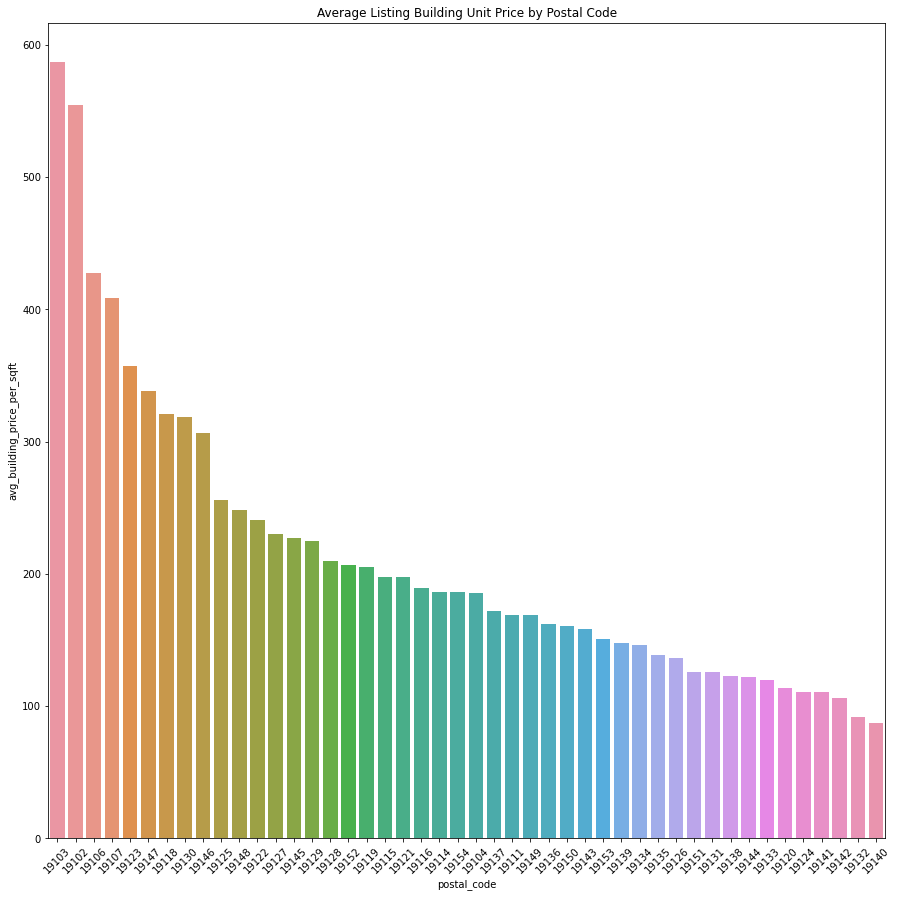

In [42]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,15))

avg_building_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_building_price_per_sqft',
                                      data=avg_unit_build_price,
                                      order=avg_unit_build_price.sort_values('avg_building_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_building_unit_price_plt.set_xticklabels(avg_unit_build_price['postal_code'], rotation=45)
plt.title('Average Listing Building Unit Price by Postal Code')
plt.show()

* The highest building avg unit price is in center city.

** **

### price per sqft (lot)

In [43]:
for_sale2 = for_sale.copy()

In [49]:
## check NAN in lot_size(sqft)
sum(for_sale2['lot_size(sqft)'].isna())

1687

In [50]:
## fill NA in lot_size(sqft)
for_sale2['lot_size(sqft)'].fillna(value=0, inplace=True)

In [51]:
sum(for_sale2['lot_size(sqft)'].isna())

0

In [52]:
## drop rows if `lot_size(sqft)` is 0
for_sale2.drop(for_sale2[(for_sale2['lot_size(sqft)']==0)].index, inplace=True)

In [53]:
for_sale2.reset_index(drop=True)

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,photo_count,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,9,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,7,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,35,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,123,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,33,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,M4145275110,condo,townhomes,for_sale,62800,1.0,1,3.0,1,NaN,Philadelphia,517 N Simpson St,19151,PA,Philadelphia,39.971127,-75.247816,West Philadelphia,1280.0,1830.0,3294473.0,Leslie Edwards,RealHome Services & Solutions
7870,M4547036087,condo,townhomes,for_sale,299900,2.0,3,3.0,29,1.0,Philadelphia,2820 Almond St,19134,PA,Philadelphia,39.981121,-75.112587,Richmond,1620.0,1296.0,412566.0,Nancy Aulett,Keller Williams Real Estate
7871,M3400474681,condo,townhomes,for_sale,94900,1.0,1,4.0,18,NaN,Philadelphia,2077 Bridge St,19124,PA,Philadelphia,40.013765,-75.070389,Wissinoming,1296.0,1064.0,NaN,NaN,Re/Max Eastern-Phil-Grant Ave
7872,M3654238233,condo,townhomes,for_sale,149900,1.0,2,3.0,14,1.0,Philadelphia,1452 N 57th St,19131,PA,Philadelphia,39.974456,-75.235244,West Philadelphia,1026.0,1231.0,950515.0,Nathan S Naness,Keller Williams Philadelphia


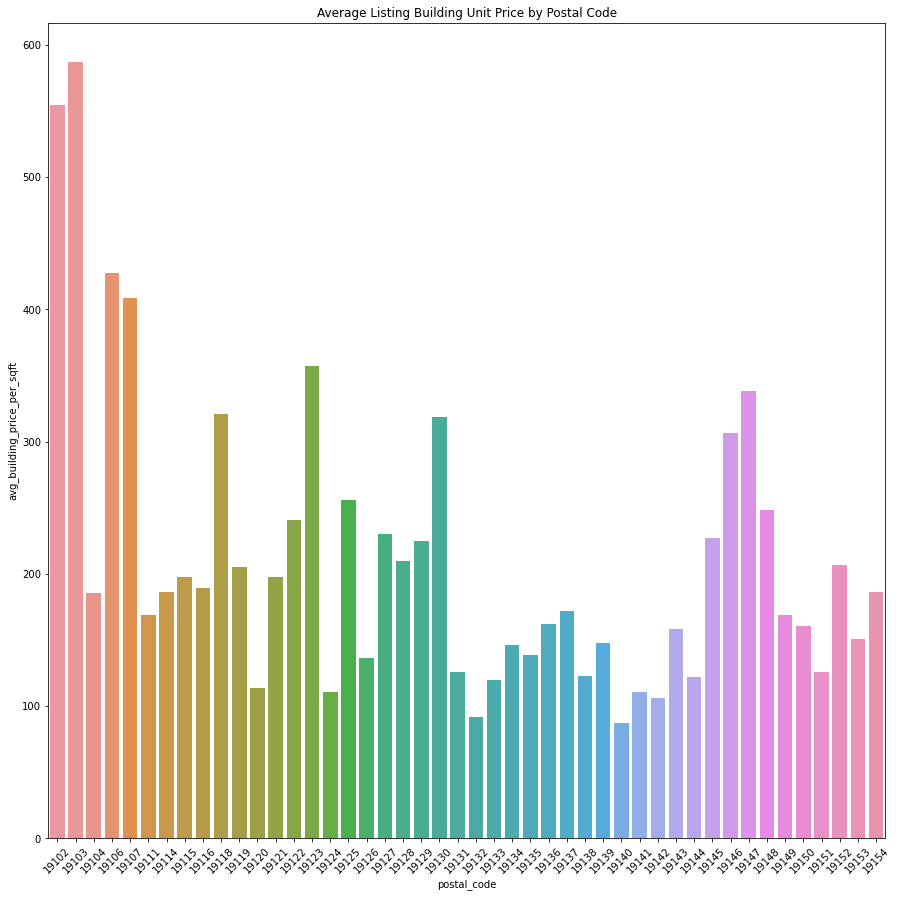

In [23]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,15))

avg_building_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_building_price_per_sqft',
                                      data=avg_unit_build_price,
                                      ax=ax
                                     )
avg_building_unit_price_plt.set_xticklabels(avg_unit_build_price['postal_code'], rotation=45)
plt.title('Average Listing Building Unit Price by Postal Code')
plt.show()

In [54]:
for_sale2.shape

(7874, 23)

In [55]:
## division
for_sale2['lot_price_per_sqft'] = for_sale2['price'] / for_sale2['lot_size(sqft)']

In [56]:
## check for 0 val
sum(for_sale2['buiding_size(sqft)'] == 0)

0

In [58]:
## check for inf val
sum(np.isinf(for_sale2['lot_price_per_sqft']))

0

In [59]:
avg_unit_lot_price = for_sale2.groupby('postal_code')['lot_price_per_sqft'].mean().reset_index().rename(columns={'lot_price_per_sqft':'avg_lot_price_per_sqft'}).sort_values(by=['avg_lot_price_per_sqft'], ascending=False)

In [60]:
avg_unit_lot_price.reset_index(drop=True)

,postal_code,avg_lot_price_per_sqft
0,19123,7440.654454
1,19102,1540.110681
2,19103,1385.195374
3,19106,1188.420330
4,19107,957.329331
5,19147,705.653089
6,19130,609.493032
7,19146,549.752007
8,19127,483.856738
9,19125,434.226273


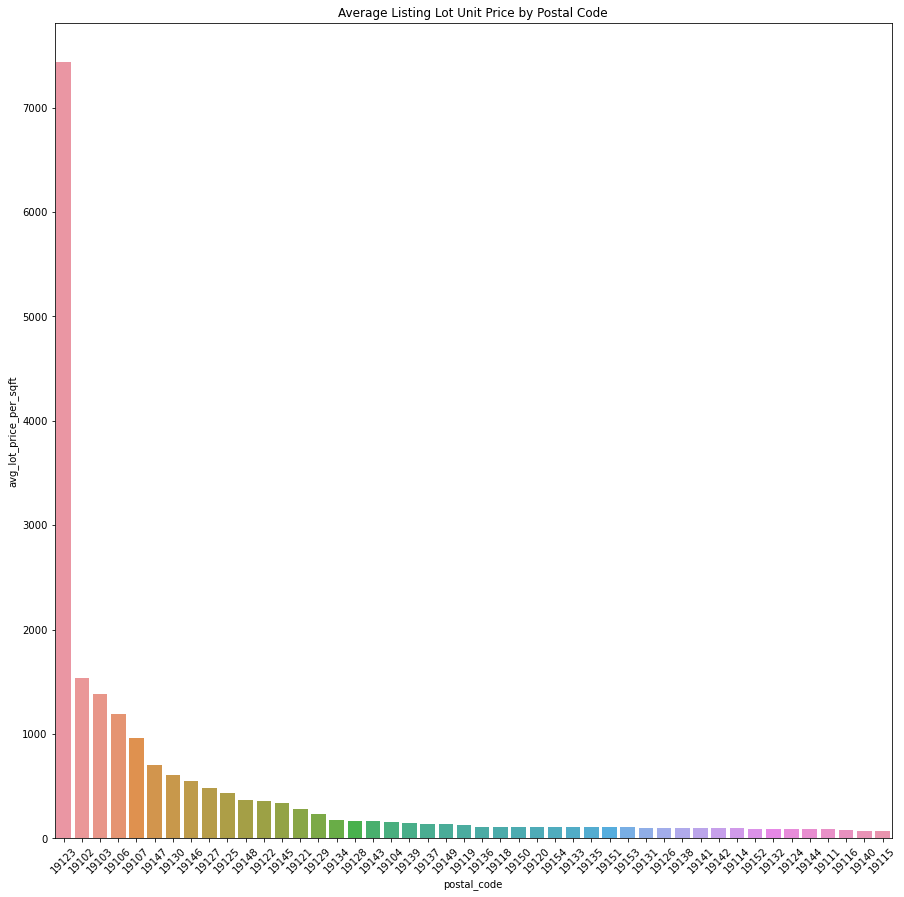

In [61]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,15))

avg_lot_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_lot_price_per_sqft',
                                      data=avg_unit_lot_price,
                                      order=avg_unit_lot_price.sort_values('avg_lot_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_lot_unit_price_plt.set_xticklabels(avg_unit_lot_price['postal_code'], rotation=45)
plt.title('Average Listing Lot Unit Price by Postal Code')
plt.show()

* Seems like the data is so unbalanced

** **

### Let's delete lot and build size that have 0s

In [77]:
for_sale3 = for_sale.copy()

In [78]:
## check NAN in lot_size(sqft)
sum(for_sale3['buiding_size(sqft)'].isna()), sum(for_sale3['lot_size(sqft)'].isna())

(1381, 1687)

In [79]:
## drop NAs
for_sale3['lot_size(sqft)'].fillna(value=0, inplace=True)
for_sale3['buiding_size(sqft)'].fillna(value=0, inplace=True)

In [80]:
## check NAN in lot_size(sqft)
sum(for_sale3['buiding_size(sqft)'].isna()), sum(for_sale3['lot_size(sqft)'].isna())

(0, 0)

In [82]:
# drop rows with 0
drop_ridx = for_sale3[ (for_sale3['buiding_size(sqft)'] ==0) | (for_sale3['lot_size(sqft)'] ==0)].index
for_sale3.drop(drop_ridx,inplace=True)

In [83]:
for_sale3.shape

(6546, 23)

In [84]:
for_sale3.reset_index(drop=True)

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,photo_count,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,9,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,7,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,35,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,123,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,33,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,M4145275110,condo,townhomes,for_sale,62800,1.0,1,3.0,1,NaN,Philadelphia,517 N Simpson St,19151,PA,Philadelphia,39.971127,-75.247816,West Philadelphia,1280.0,1830.0,3294473.0,Leslie Edwards,RealHome Services & Solutions
6542,M4547036087,condo,townhomes,for_sale,299900,2.0,3,3.0,29,1.0,Philadelphia,2820 Almond St,19134,PA,Philadelphia,39.981121,-75.112587,Richmond,1620.0,1296.0,412566.0,Nancy Aulett,Keller Williams Real Estate
6543,M3400474681,condo,townhomes,for_sale,94900,1.0,1,4.0,18,NaN,Philadelphia,2077 Bridge St,19124,PA,Philadelphia,40.013765,-75.070389,Wissinoming,1296.0,1064.0,NaN,NaN,Re/Max Eastern-Phil-Grant Ave
6544,M3654238233,condo,townhomes,for_sale,149900,1.0,2,3.0,14,1.0,Philadelphia,1452 N 57th St,19131,PA,Philadelphia,39.974456,-75.235244,West Philadelphia,1026.0,1231.0,950515.0,Nathan S Naness,Keller Williams Philadelphia


In [85]:
## division
for_sale3['lot_price_per_sqft'] = for_sale3['price'] / for_sale3['lot_size(sqft)']
for_sale3['build_price_per_sqft'] = for_sale3['price'] / for_sale3['buiding_size(sqft)']

In [86]:
## check for 0 val
sum(for_sale3['buiding_size(sqft)'] == 0)

0

In [87]:
## check for inf val
sum(np.isinf(for_sale3['lot_price_per_sqft']))

0

In [88]:
avg_unit_build_price = for_sale3.groupby('postal_code')['build_price_per_sqft'].mean().reset_index().rename(columns={'build_price_per_sqft':'avg_build_price_per_sqft'}).sort_values(by=['avg_build_price_per_sqft'], ascending=False)
avg_unit_lot_price = for_sale3.groupby('postal_code')['lot_price_per_sqft'].mean().reset_index().rename(columns={'lot_price_per_sqft':'avg_lot_price_per_sqft'}).sort_values(by=['avg_lot_price_per_sqft'], ascending=False)

In [90]:
avg_unit_build_price.reset_index(drop=True)

,postal_code,avg_build_price_per_sqft
0,19102,830.011564
1,19103,543.504499
2,19106,449.794824
3,19107,447.053006
4,19147,327.182393
5,19130,312.045954
6,19118,299.976726
7,19123,295.630273
8,19146,283.980611
9,19125,250.055211


In [91]:
avg_unit_lot_price.reset_index(drop=True)

,postal_code,avg_lot_price_per_sqft
0,19102,1765.550301
1,19103,1406.901672
2,19106,1240.518342
3,19107,957.329331
4,19147,710.726291
5,19123,653.344688
6,19130,612.706709
7,19146,577.168535
8,19127,497.227977
9,19125,455.728015


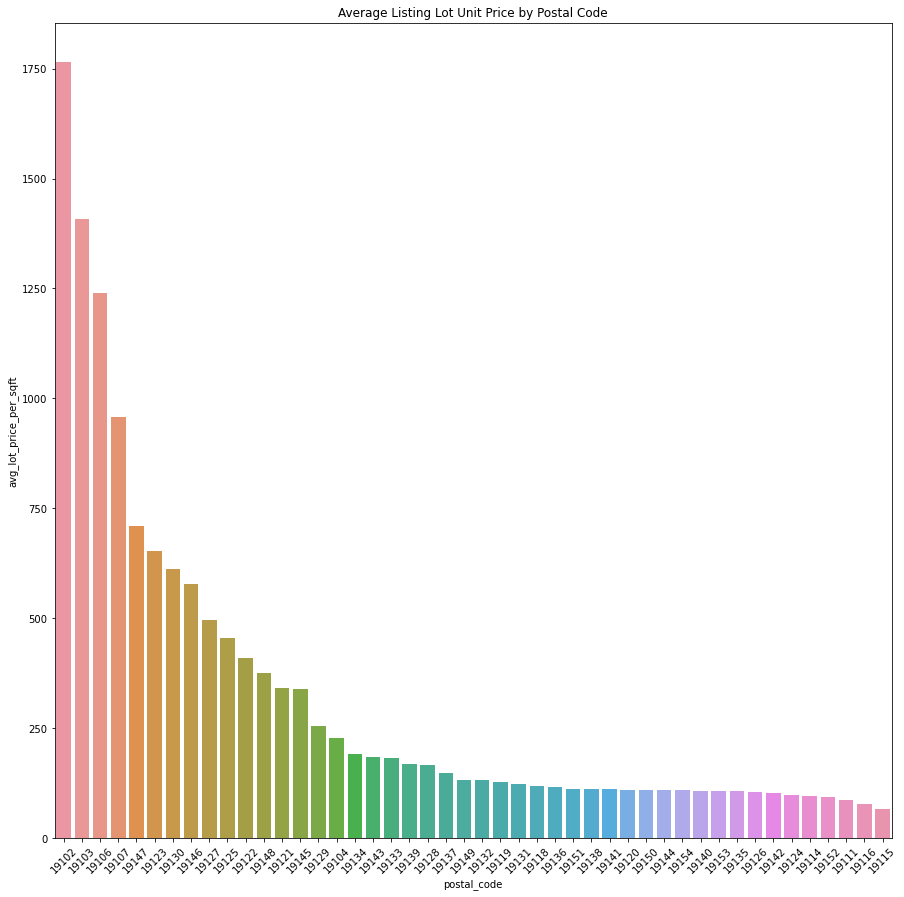

In [92]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,15))

avg_lot_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_lot_price_per_sqft',
                                      data=avg_unit_lot_price,
                                      order=avg_unit_lot_price.sort_values('avg_lot_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_lot_unit_price_plt.set_xticklabels(avg_unit_lot_price['postal_code'], rotation=45)
plt.title('Average Listing Lot Unit Price by Postal Code')
plt.show()

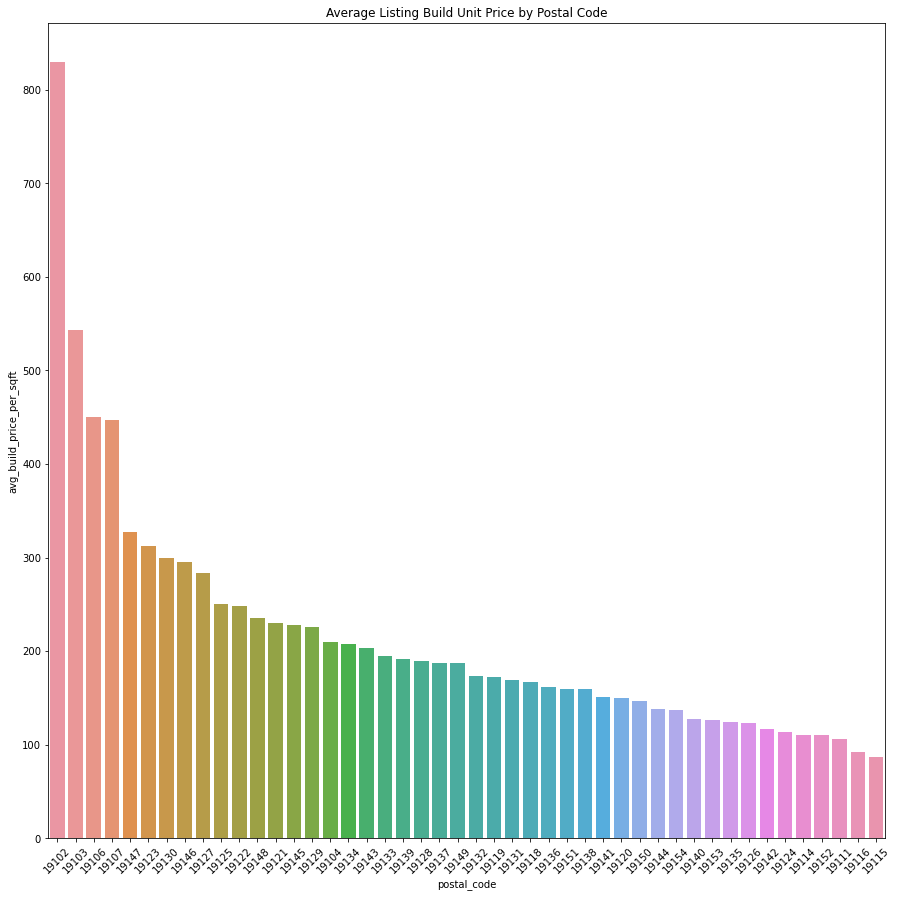

In [93]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,15))

avg_lot_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_build_price_per_sqft',
                                      data=avg_unit_build_price,
                                      order=avg_unit_build_price.sort_values('avg_build_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_lot_unit_price_plt.set_xticklabels(avg_unit_lot_price['postal_code'], rotation=45)
plt.title('Average Listing Build Unit Price by Postal Code')
plt.show()

** **
### Put it together

In [104]:
# add col to df
avg_unit_build_price['type']='avg_build_price_per_sqft'
avg_unit_lot_price['type']='avg_lot_price_per_sqft'

# rename col
avg_unit_build_price.rename(columns={'avg_build_price_per_sqft':'unit_price'}, inplace=True)
avg_unit_lot_price.rename(columns={'avg_lot_price_per_sqft':'unit_price'}, inplace=True)

In [139]:
avg_unit_combined = pd.concat([avg_unit_build_price, avg_unit_lot_price], axis =0, ignore_index=True)

In [140]:
avg_unit_combined = avg_unit_combined.sort_values(by=['postal_code']).reset_index(drop=True)

In [141]:
avg_unit_combined.head()

,postal_code,unit_price,type
0,19102,830.011564,avg_build_price_per_sqft
1,19102,1765.550301,avg_lot_price_per_sqft
2,19103,543.504499,avg_build_price_per_sqft
3,19103,1406.901672,avg_lot_price_per_sqft
4,19104,227.948611,avg_lot_price_per_sqft


In [143]:
avg_unit_combined['postal_code'] = avg_unit_combined['postal_code'].astype(str)

In [150]:
postal_order = avg_unit_combined['postal_code'].unique().tolist()

In [147]:
avg_unit_combined['postal_code'] = pd.Categorical(avg_unit_combined['postal_code'], categories=postal_order)

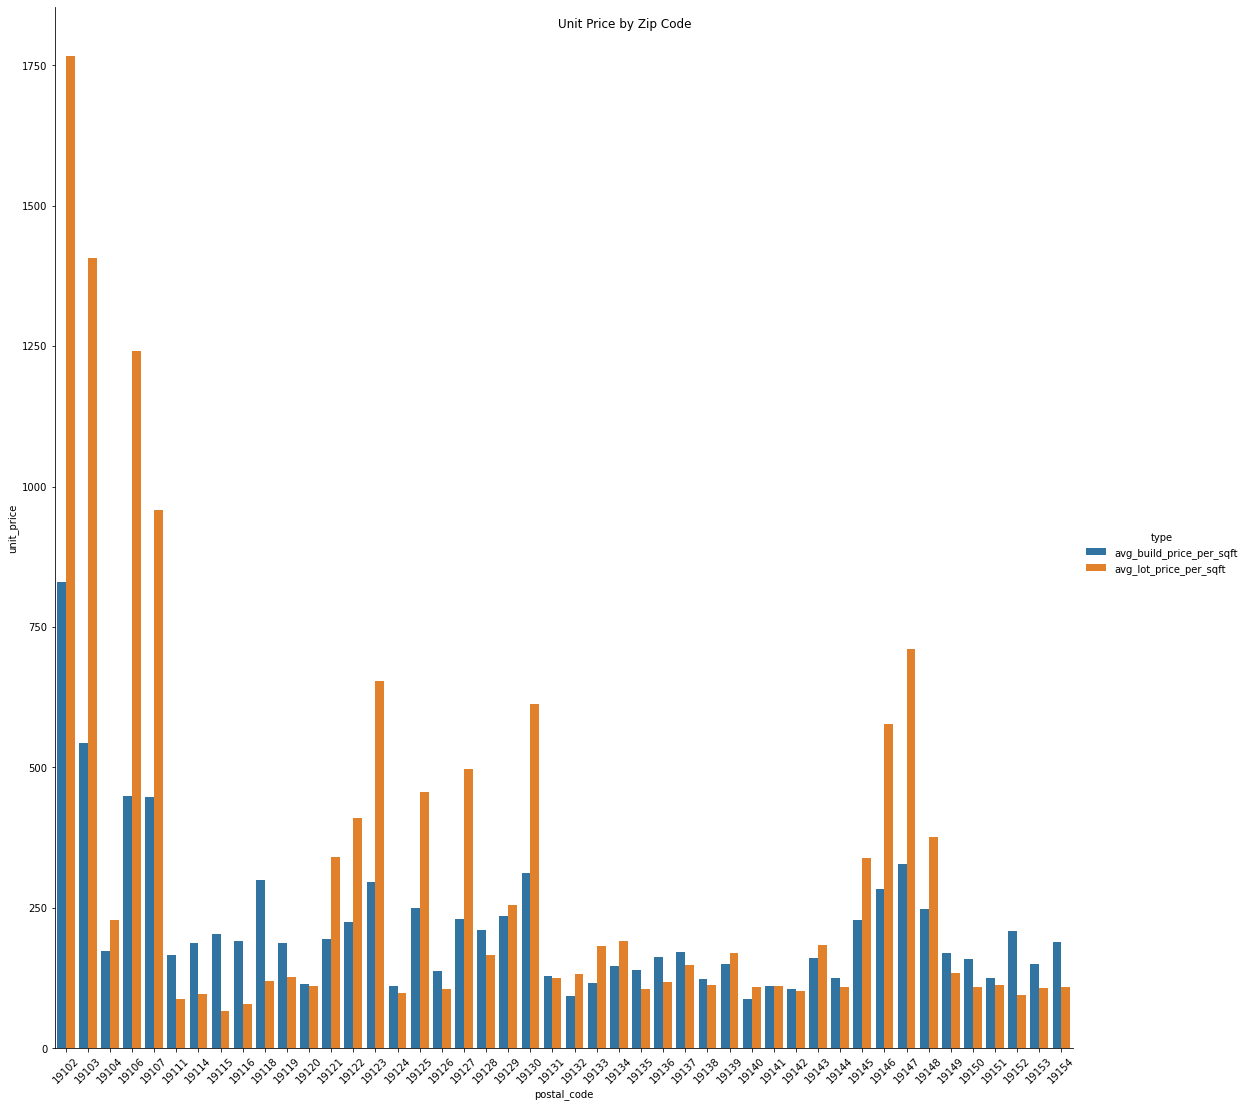

In [154]:
%matplotlib inline

combined_unit_plot = sns.catplot(x='postal_code',
                                 y='unit_price',
                                 hue='type',
                                 data=avg_unit_combined,
                                 kind='bar',
                                 height=15
                                )
combined_unit_plot.fig.suptitle('Unit Price by Zip Code')
combined_unit_plot.set_xticklabels(rotation=45)
# plt.title('Average Listing Build Unit Price by Postal Code')
plt.show()